In [30]:
import neat
import os
import evogym.envs
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import numpy as np
from pathos.multiprocessing import ProcessPool
import errno
import dill
import sys
sys.path.append('../')

import neat
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net

import itertools as it
import time
import imageio

import sgr_main as sgr
from matplotlib import pyplot as plt


from substrates import morph_substrate_in_1_out_robot, control_substrate
from generate_robot import generate_robot_in_1_out_robot

In [31]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate_in_1_out_robot(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot_in_1_out_robot(design_net, params["robot_size"])
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

In [32]:
ENV = "Walker-v0" # env_names = ["CaveCrawler-v0", "UpStepper-v0", "ObstacleTraverser-v0"]
STEPS = 500
ROBOT_SIZE = 5
POP = 64

params = {"robot_size": ROBOT_SIZE, "env": ENV, "steps": STEPS, "pop_size": POP}

neat_config = neat.config.Config(
    neat.genome.DefaultGenome, 
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../neat_configs/hyperNEAT_config"
)


In [35]:
directory = "results/" + ENV
file = "run_2_genomes.pkl"

best_fit = -1000
champion = None
with open(f"../{directory}/{file}", "rb") as file:
    genomes = dill.load(file)
    for g_id, g in genomes:
        if g.fitness > best_fit:
            best_fit = g.fitness
            champion = g
    
pop = neat.Population(neat_config)
pop.population = {g_id: g for g_id, g in genomes} 
pop.species = neat_config.species_set_type(neat_config.species_set_config, pop.reporters)
pop.species.speciate(pop.config, pop.population, pop.generation)
pop.best_genome = champion

Specie  1


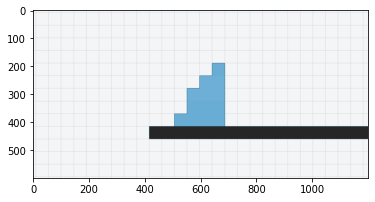

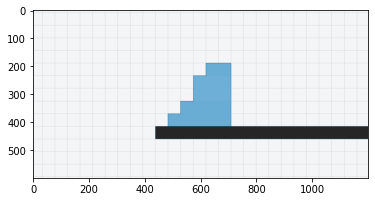

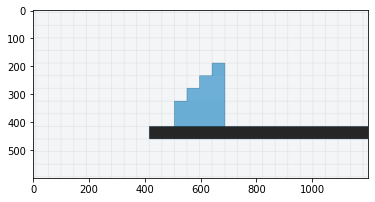

Specie  2


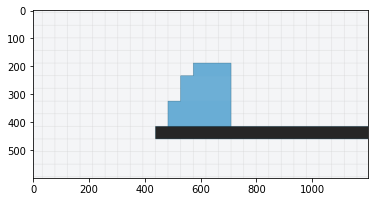

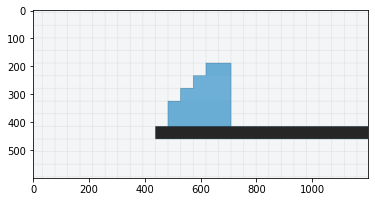

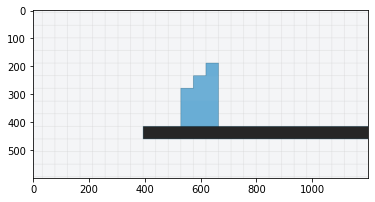

Specie  3


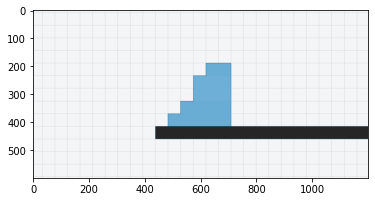

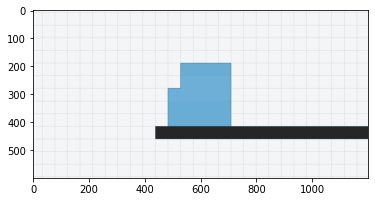

Specie  4


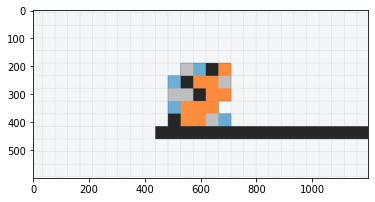

Specie  5


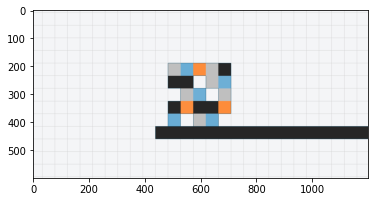

Specie  6
Specie  7
Specie  8


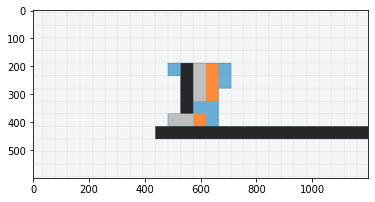

Specie  9
Specie  10


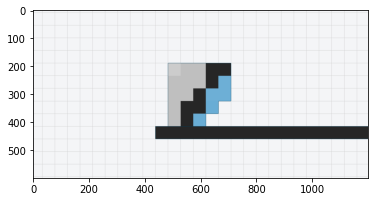

Specie  11


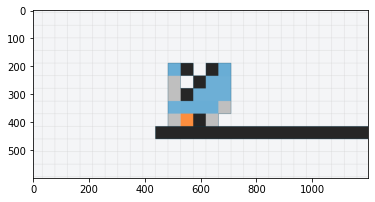

Specie  12
Specie  13


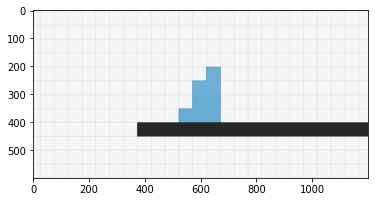

Specie  14
Specie  15
Specie  16


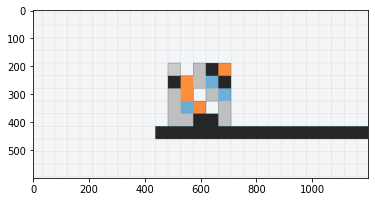

Specie  17
Specie  18


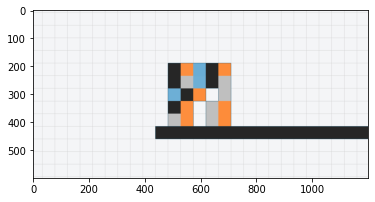

Specie  19
Specie  20


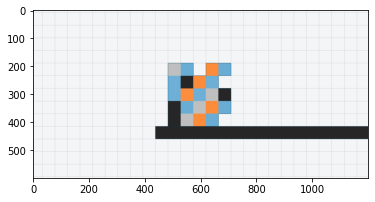

Specie  21
Specie  22
Specie  23
Specie  24
Specie  25
Specie  26


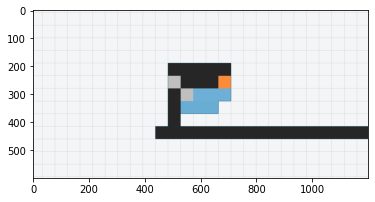

Specie  27
Specie  28
Specie  29


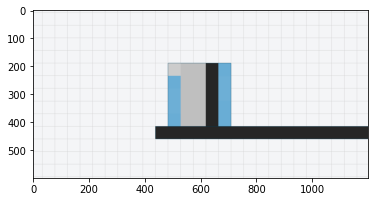

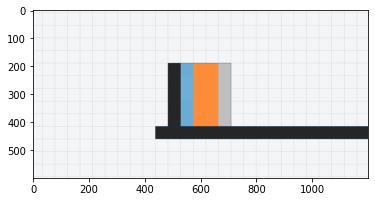

Specie  30


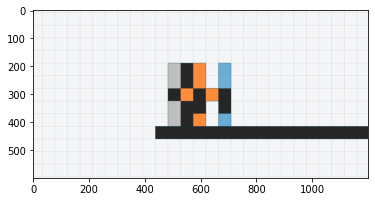

Specie  31
Specie  32
Specie  33


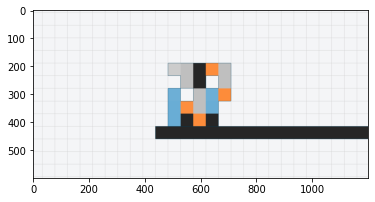

Specie  34


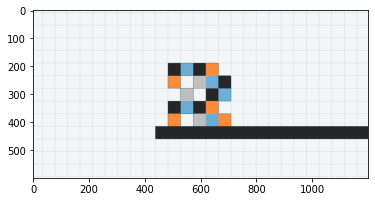

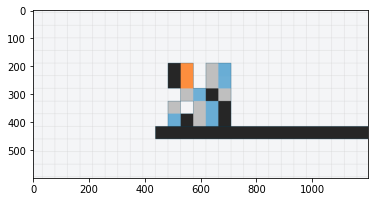

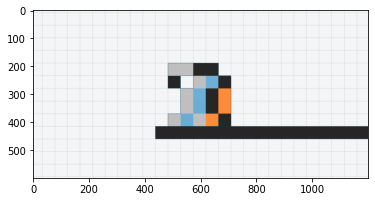

Specie  35


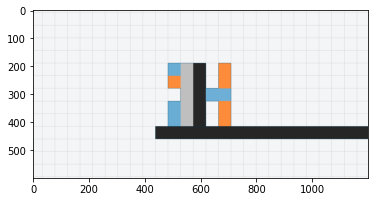

Specie  36
Specie  37


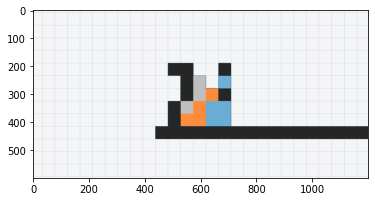

Specie  38


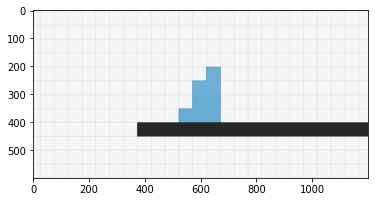

Specie  39
Specie  40
Specie  41


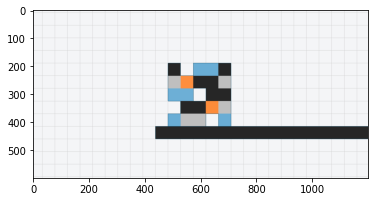

Specie  42


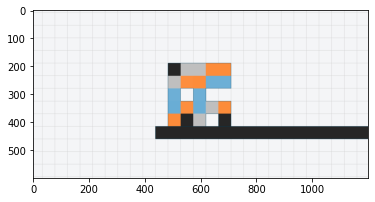

Specie  43


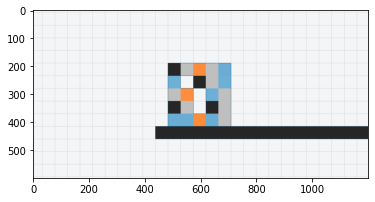

Specie  44


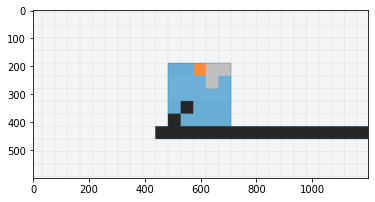

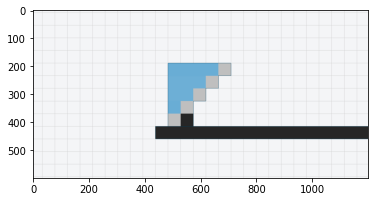

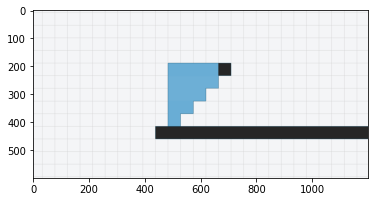

Specie  45
Specie  46
Specie  47
Specie  48
Specie  49
Specie  50
Specie  51
Specie  52
Specie  53
Specie  54
Specie  55
Specie  56


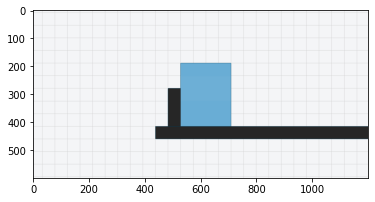

Specie  57
Specie  58


In [36]:
for k, v in pop.species.species.items():
    print("Specie ", k)
    for g in v.members.values():
        if g.fitness != None and g.fitness > 1:
            # hyper.single_genome_fit(
            #     g, 
            #     params, 
            #     neat_config, 
            #     True
            # )
            r, img = get_robot(g, params, neat_config)
            if img is not None:
                plt.imshow(img)
                plt.show()


In [37]:
champion = pop.best_genome
sgr.single_genome_fit(champion, params, neat_config, True)

(6.080866359333003, True)